# Assignment Four

Brandon Whittle

October 29, 2023

CivE 6388 - Advanced Hydrology

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

%load_ext lab_black

## Problem One 

### Question

Solve probelm 8-3 (page 288) in the textbook.

(8-3) A model is used to predict values of $y$, with the predicted values $\hat{Y}$ compared to the measured values ($Y$). The predicted and measured values of a random variable are:

| $\hat{Y}$ | 6.1 | 8.3 | 4.7 | 5.2 | 7.6 |
|---|---|---|---|---|---|
| $Y$ | 5.7 | 7.5 | 4.4 | 4.7 | 7.1 |

Discuss the model from the standpoint of prediction bias.

### Solution

Firstly, we must compute the expected values of both the predicted and mesured values, for which we use the following equation:

\begin{equation}
    \theta = \frac{\Sigma_{i=1}^nX_i}{n}
\end{equation}

where $n=5$ and $X$ represents either $Y$ or $\hat{Y}$ depending on which we are finding the expected value of.

Next, we determine bias as follows:

\begin{equation}
    Bias = E[\hat{\theta}]-\theta
\end{equation}

Mean of predicitons: 6.38
Mean of measured: 5.88
Bias: 0.5


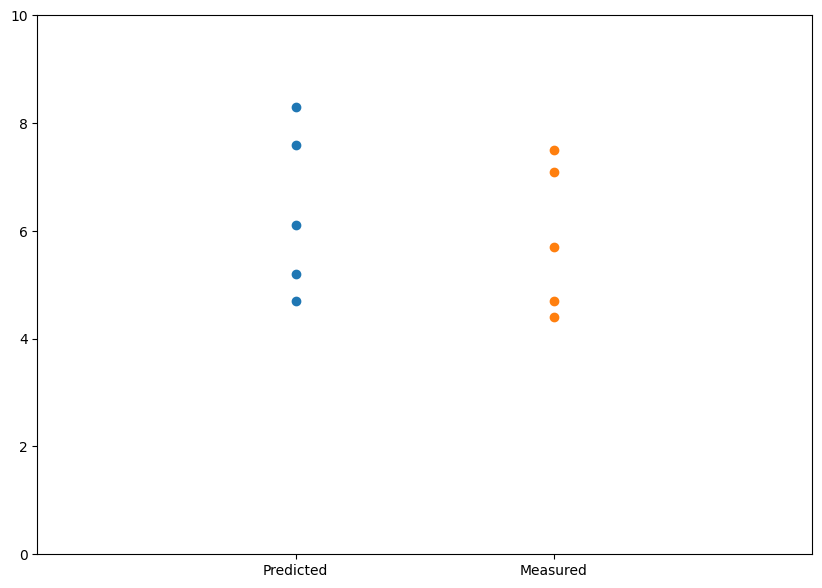

In [2]:
p01_predicted = [6.1, 8.3, 4.7, 5.2, 7.6]
p01_measured = [5.7, 7.5, 4.4, 4.7, 7.1]

p01_predicted_mean = np.mean(p01_predicted)
p01_measured_mean = np.mean(p01_measured)

p01_bias = p01_predicted_mean - p01_measured_mean

print(f"Mean of predicitons: {p01_predicted_mean}")
print(f"Mean of measured: {p01_measured_mean}")
print(f"Bias: {p01_bias}")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter([1] * len(p01_predicted), p01_predicted)
ax.scatter([2] * len(p01_measured), p01_measured)
ax.set(xlim=(0, 3), ylim=(0, 10))
ax.set_xticks([1, 2], labels=["Predicted", "Measured"])
plt.show()

## Problem Two

### Question

Solve problem 8-7 (page 288) in the textbook. Please use mean square error (MSE) to discuss the accuracy.

(8-7) If we know that the true specific weight of dry sand is 100 $\frac{\text{lb}}{\text{ft}^3}$, which of the following two methods of estimation provide more precise estimates:

| Method 1 | 102.4 | 101.9 | 102.6 | 102.1 | 101.7 |
|---|---|---|---|---|---|
| Method 2 |  99.7 | 101.6 |  98.5 | 102.3 | 100.9 |

Which method has the lesser bias? Discuss the accuracy of the two methods.

### Solution

First, we will calculate the mean of both methods' predicitons using the mean formula from Problem One. This will be used to determine the bias of each method, again, using the equation from Problem One. 

Next, we will determine the variance of each method according to the sample variance formula:

\begin{equation}
    s^2 = \frac{1}{n-1}\Sigma_{i=1}^{n}(\hat{\theta_i}-\hat{\theta})^2
\end{equation}

Finally, we will calculate the mean square error (MSE) using the following formula:

\begin{equation}
    MSE = \frac{1}{n} \Sigma_{i=1}^{n}(\theta - \hat{\theta_i})^2
\end{equation}

Method 1 Bias: 2.14
Method 2 Bias: 0.60
Method 1 Variance: 0.13
Method 2 Variance: 2.30
Method 1 MSE: 4.69
Method 2 MSE: 2.20


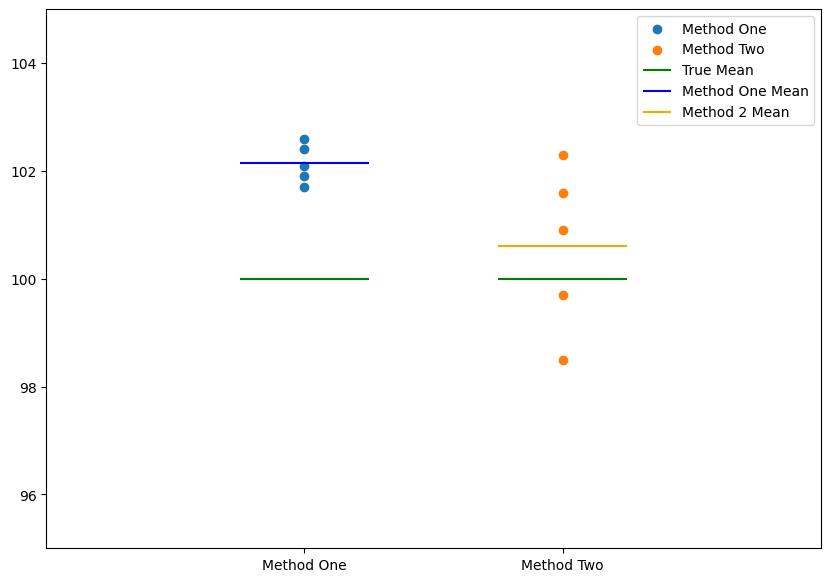

In [3]:
p02_true_mean = 100
p02_method_one = [102.4, 101.9, 102.6, 102.1, 101.7]
p02_method_two = [99.7, 101.6, 98.5, 102.3, 100.9]

# Bias

p02_method_one_mean = np.mean(p02_method_one)
p02_method_two_mean = np.mean(p02_method_two)

p02_method_one_bias = p02_method_one_mean - p02_true_mean
p02_method_two_bias = p02_method_two_mean - p02_true_mean

print(f"Method 1 Bias: {p02_method_one_bias:.2f}")
print(f"Method 2 Bias: {p02_method_two_bias:.2f}")

# Variance


def variance(method_values):
    method_mean = np.mean(method_values)
    temp_sum = 0
    for value in method_values:
        temp_sum += np.power(value - method_mean, 2)
    return 1 / (len(method_values) - 1) * temp_sum


p02_method_one_variance = variance(p02_method_one)
p02_method_two_variance = variance(p02_method_two)

print(f"Method 1 Variance: {p02_method_one_variance:.2f}")
print(f"Method 2 Variance: {p02_method_two_variance:.2f}")

# Mean Squared Error


def mean_squared_error(method_values, true_mean):
    temp_sum = 0
    for value in method_values:
        temp_sum += np.power(true_mean - value, 2)
    return 1 / len(method_values) * temp_sum


p02_method_one_mse = mean_squared_error(p02_method_one, p02_true_mean)
p02_method_two_mse = mean_squared_error(p02_method_two, p02_true_mean)

print(f"Method 1 MSE: {p02_method_one_mse:.2f}")
print(f"Method 2 MSE: {p02_method_two_mse:.2f}")

# Plot for clarity
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter([1] * len(p02_method_one), p02_method_one, label="Method One")
ax.scatter([2] * len(p02_method_two), p02_method_two, label="Method Two")
ax.set(xlim=(0, 3), ylim=(95, 105))
ax.set_xticks([1, 2], labels=["Method One", "Method Two"])
plt.hlines(100, 0.75, 1.25, colors="g", label="True Mean")
plt.hlines(100, 1.75, 2.25, colors="g")
plt.hlines(p02_method_one_mean, 0.75, 1.25, colors="b", label="Method One Mean")
plt.hlines(p02_method_two_mean, 1.75, 2.25, colors="orange", label="Method 2 Mean")
plt.legend()
plt.show()

As can be seen in the above calculations and graph, Method 1 has a higher bias, while Method 2 has a higher variance. The calcualtions for MSE tell use that Method 2 is a more accurate representation, but because of Method 1's low variance, it may be easier to use Method 1 and correct for the higher bias to yield the highest accuracy in predictions.

## Problem Three

### Question

Solve the problem 8-18 (page 289) in the textbook. 

(8-18) Use the method of moments to derive an estimator of $b$ for the following density function:

\begin{equation}
    f_X(x) = 
    \left\{
        \begin{array}{lr}
            \frac{2x}{b^2}, & \text{for } 0 \leq x \leq b \nonumber \\
            0, & \text{otherwise}
        \end{array} \right\}
\end{equation}

### Solution

To use the method of moments, we will first need to determine the first moment of the distribution (mean), which can be calculated as follows:

\begin{align}
    \int_0^\mu \frac{2x}{b^2}\,dx &= \frac{1}{2} \nonumber \\
    \frac{2}{b^2} \int_0^\mu x\,dx &= \frac{1}{2} \nonumber \\
    \frac{2}{b^2}\cdot\frac{\mu^2}{2} &= \frac{1}{2} \nonumber \\
    \mu^2 &= \frac{b^2}{2} \nonumber \\
    \mu &= \frac{b}{\sqrt{2}} \nonumber 
\end{align}

Now that we have the first moment, we can solve for $b$ to get an estimator:

\begin{equation}
    b = \boxed{\mu\sqrt{2}}
\end{equation}

## Problem Four

### Question

Solve problem 8-24 (page 289).

(8-24) Use the method of maximum likelihood to derive estimators for the two-parameter exponential function

\begin{equation}
    f(x) = \frac{1}{b}e^{-\frac{x-a}{b}}
\end{equation}

### Solution

I understand the premise and steps of this problem, but I can't work out the math, and got an unsolvable equation for b. Apparently my calc II is rusty.

## Problem Five

### Question

Solve problem 9-13 (page 236). Use $\alpha = 0.05$.

(9-13) Results of testing for the presence of pollutants in a local stream have a mean of 10 $\frac{\text{mg}}{\text{L}}$ and a standard deviation of 2 $\frac{\text{mg}}{\text{L}}$. Six samples of water collected from the stream result in the following measurements: 12.7, 15.1, 9.5, 13.7, 19.6, and 16.4 $\frac{\text{mg}}{\text{L}}$. Does the level of pollutants in the stream exceed the original finding of 10 $\frac{\text{mg}}{\text{L}}$?

### Solution

In [79]:
from scipy.stats import ttest_1samp
from scipy.stats import t

p05_sample = [12.7, 15.1, 9.5, 13.7, 19.6, 16.4]
pop_mean = 10

p05_sample_mean = np.mean(p05_sample)
print(f"Sample Mean: {p05_sample_mean:.2f}")


def standard_deviation(sample_values, sample_mean):
    temp_sum = 0
    for value in sample_values:
        temp_sum += np.power(value - sample_mean, 2)
    return np.sqrt((1 / (len(sample_values) - 1)) * temp_sum)


p05_sample_stdd = standard_deviation(p05_sample, p05_sample_mean)
print(f"Sample Standard Deviation: {p05_sample_stdd:.2f}")


def t_test_one_sample(sample_values, sample_mean, sample_stdd, population_mean):
    return (sample_mean - population_mean) / (sample_stdd / np.sqrt(len(sample_values)))


p05_sample_t_value = t_test_one_sample(
    p05_sample, p05_sample_mean, p05_sample_stdd, pop_mean
)
print(f"Sample T Value: {p05_sample_t_value:.4f}")

t_alpha = t.isf(0.05, 5)

print(f"T Alpha at 0.05: {t_alpha:.4f}")

if t_alpha < p05_sample_t_value:
    print("Previous pollution level exceeded")
else:
    print("Previous pollution level not exceeded")


# Confirm with built-in function, because why not
# p_value is less than 0.05, so yeah (I think)
ttest_1samp(p05_sample, popmean=10, alternative="greater")

Sample Mean: 14.50
Sample Standard Deviation: 3.43
Sample T Value: 3.2126
T Alpha at 0.05: 2.0150
Previous pollution level exceeded


TtestResult(statistic=3.212647026585895, pvalue=0.011829389291522146, df=5)

## Problem Six

### Question

Develop a generator of the exponentially distributed random variables with the probability density function (pdf):

\begin{equation}
    f(x) = \lambda e^{-\lambda x}, x<0
\end{equation}

Assume $\lambda=1$ and calculate the probability, $P (0\leq x \leq 1)$ both theoretically and empirically (using the developed generator). For the empirical calculation, generate 10, 100, 500, 1000, 5000, and 10000 samples and repeat the experiement 1000 times for each different number of samples. Show how the bias and precision of the estimated probability change with the different number of samples. Use graphical interpretation/representation as necessary. 

### Solution

First, we can develop a generator that adheres to the given distribution by taking advantage of the CDF as a mapping tool. The first step is to obtain the CDF from the PDF. 

\begin{align}
    F(x) &= \int \lambda e^{-\lambda x}\, dx \nonumber \\
         &= \int 1 \cdot e^{-1 \cdot x}\, dx \nonumber \\
         &= \int e^{-x}\, dx \nonumber \\
         &= -e^{-x} + C \nonumber \\
       0 &= -e^{-(0)} + C \nonumber \\
         &= -1 + C \nonumber \\
       C &= 1 \nonumber \\ 
    F(x) &= 1-e^{-x} \nonumber 
\end{align}

Next, we will invert the CDF along the x-y bisector, giving us a function that can be used to generate valid numbers from a uniform [0,1) imput. 

\begin{align}
    x &= 1-e^{-y} \nonumber \\
    x-1 &= -e^{-y} \nonumber \\
    1-x &= e^{-y} \nonumber \\
    \ln{(1-x)} &= -y \nonumber \\
    y &= -\ln{(1-x)} \nonumber 
\end{align}

This will be used in the code below for a simulation. To theoretically calculate the probability $P (0\leq x \leq 1)$, we can simply plug $1$ into the CDF (or integrate the PDF from 0 to 1) to get a value of 0.632, or approximately 63%.

10 Sample Simulation Probabilities: [0.8, 0.4, 0.6, 0.5, 0.6, 0.5, 0.8, 0.7, 0.7, 0.6]
10 Sample Simulation Probabilities Mean: 0.6342
10 Sample Simulation Probabilities Bias: 0.002100
100 Sample Simulation Probabilities: [0.59, 0.69, 0.6, 0.69, 0.61, 0.6, 0.65, 0.69, 0.63, 0.72]
100 Sample Simulation Probabilities Mean: 0.6322
100 Sample Simulation Probabilities Bias: 0.000060
500 Sample Simulation Probabilities: [0.636, 0.636, 0.636, 0.606, 0.612, 0.622, 0.624, 0.654, 0.65, 0.62]
500 Sample Simulation Probabilities Mean: 0.6318
500 Sample Simulation Probabilities Bias: -0.000294
1000 Sample Simulation Probabilities: [0.64, 0.629, 0.642, 0.62, 0.622, 0.638, 0.652, 0.64, 0.649, 0.635]
1000 Sample Simulation Probabilities Mean: 0.6312
1000 Sample Simulation Probabilities Bias: -0.000857
5000 Sample Simulation Probabilities: [0.6362, 0.63, 0.6278, 0.633, 0.6232, 0.6378, 0.6288, 0.628, 0.626, 0.6378]
5000 Sample Simulation Probabilities Mean: 0.6323
5000 Sample Simulation Probabilities Bi

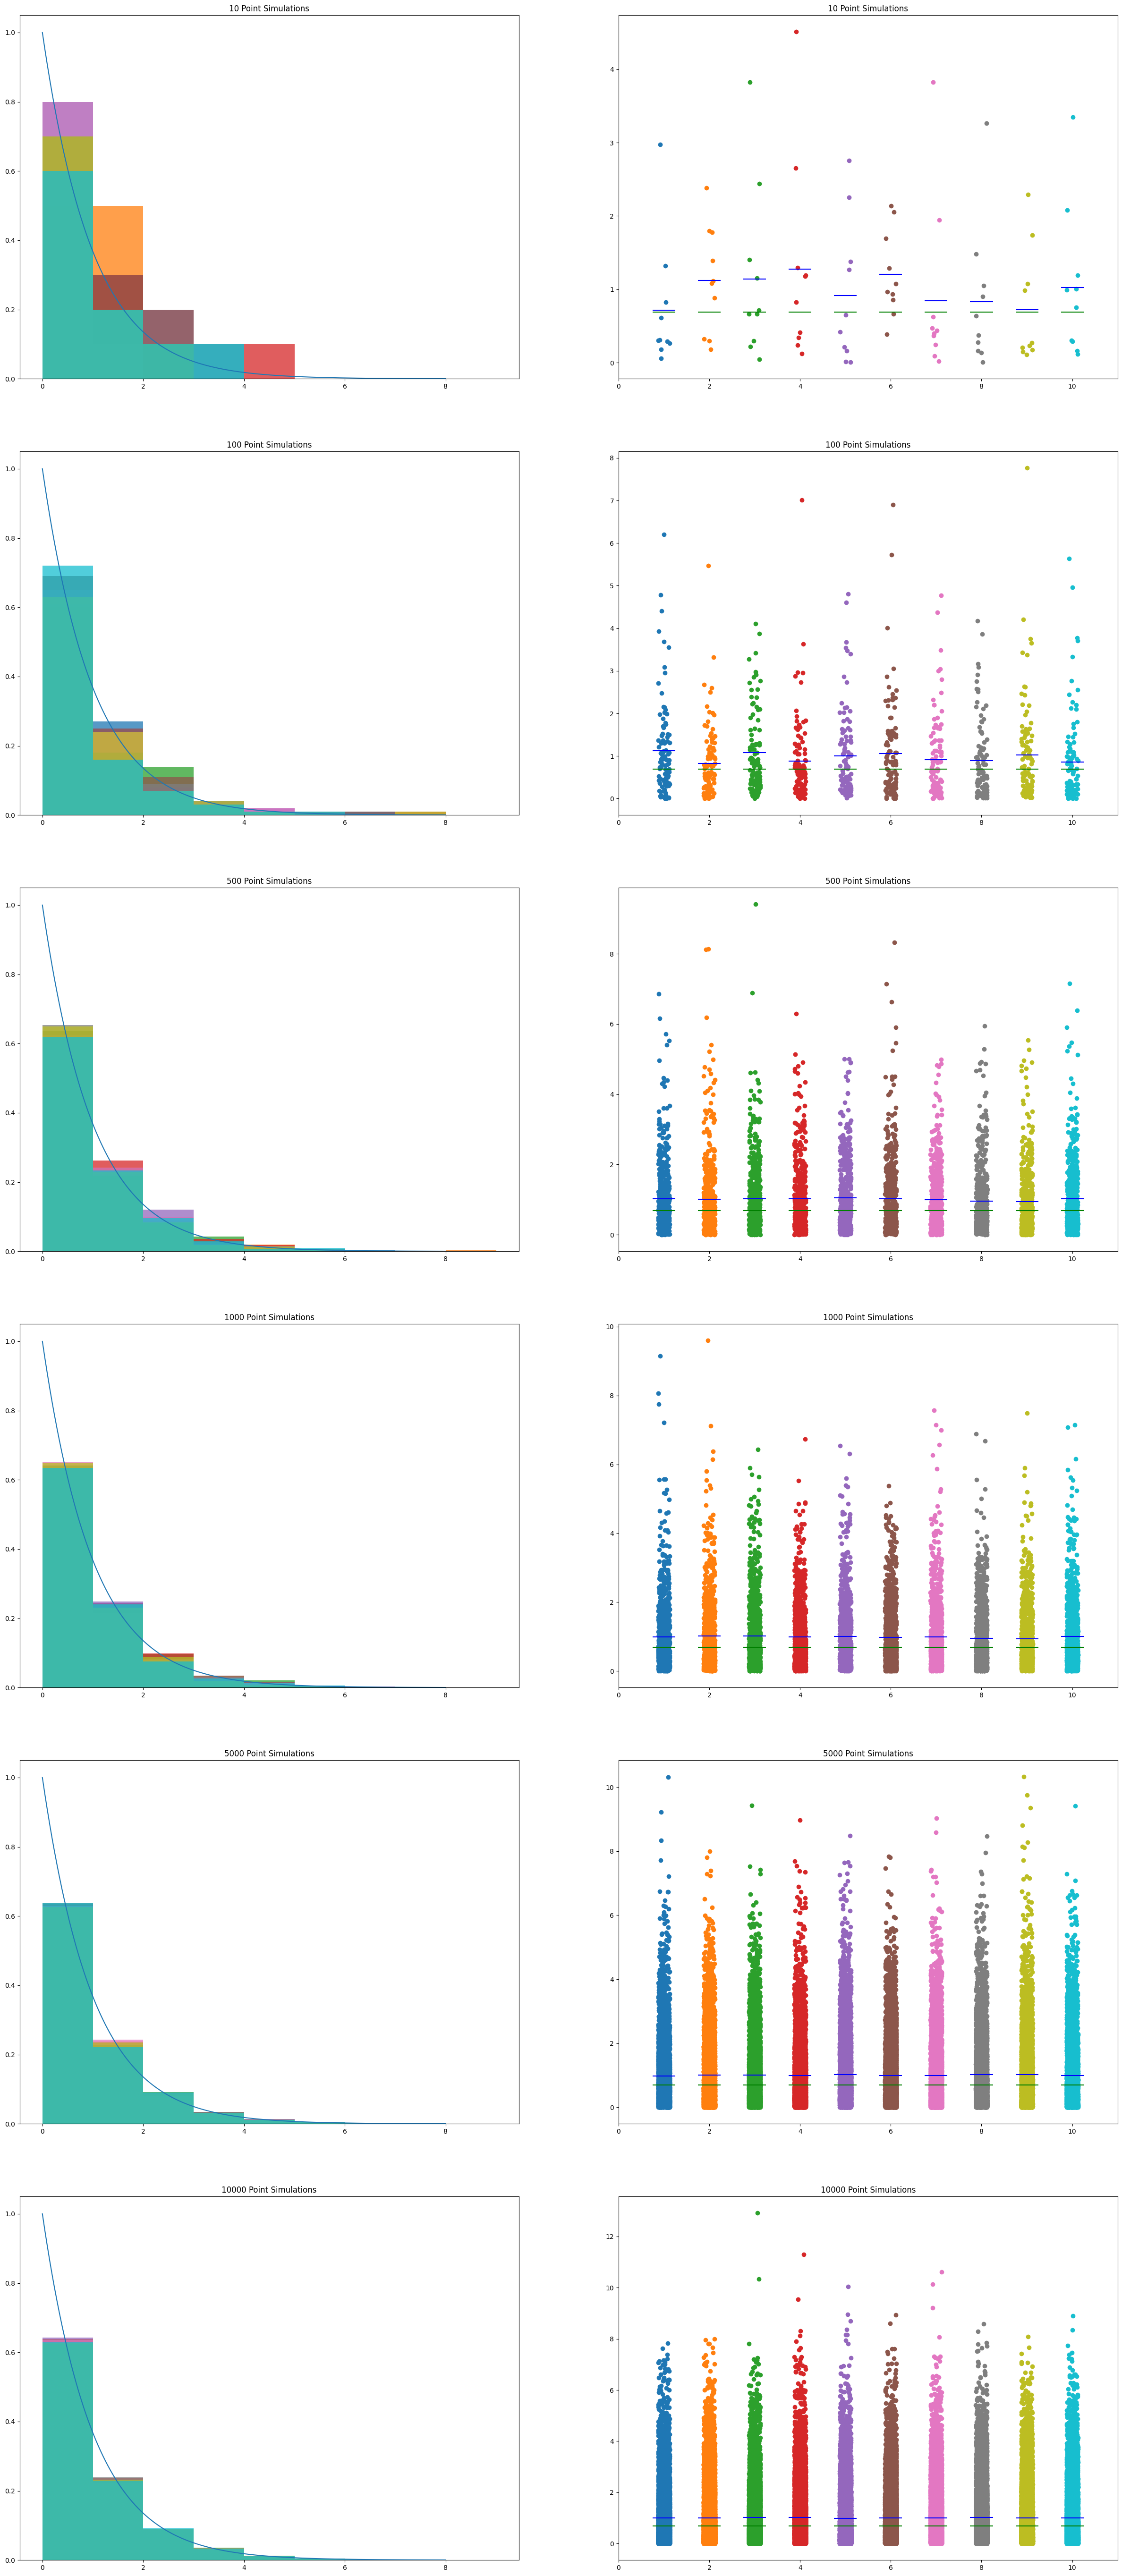

In [78]:
uniform = np.random.uniform

fig, ax = plt.subplots(6, 2, figsize=(30, 70))

# Define important functions and generator


def exp_func(x):
    return np.exp(-x)


def exp_generator():
    return -np.log(1 - uniform())


def bin_number(n):
    return round(1 + 3.3 * np.log10(n), 0)


# Main generator to handle making 1000 sample sets, producing stats, and graphing


def generate_sample_set(n, i):
    # Generate the sample sets
    sample_sets = []
    for _ in range(1000):
        trial = []
        for _ in range(n):
            trial.append(exp_generator())
        sample_sets.append(trial)

    # Very poorly code a way to estimate the percentage between zero and one
    sample_set_probabilities = []
    for sample_set in sample_sets:
        sample_set_valid_points = 0
        for sample in sample_set:
            if sample <= 1:
                sample_set_valid_points += 1
            else:
                pass
        sample_set_probabilities.append(sample_set_valid_points / n)

    print(f"{n} Sample Simulation Probabilities: {sample_set_probabilities[0:10]}")
    print(
        f"{n} Sample Simulation Probabilities Mean: {np.mean(sample_set_probabilities):.4f}"
    )
    print(
        f"{n} Sample Simulation Probabilities Bias: {(np.mean(sample_set_probabilities)-0.6321):.6f}"
    )

    # Get the mean of each sample set for graphs
    sample_set_means = []
    for sample_set in sample_sets:
        sample_set_means.append(np.mean(sample_set))

    # Plot ten of them on top of eachother for each set to graphically show the stability of each
    for sample_set in sample_sets[0:10]:
        ax[i][0].hist(
            sample_set,
            bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
            weights=np.ones_like(sample_set) / len(sample_set),
            alpha=0.75,
        )
        p06_x = np.linspace(0, 8, 1000)
        ax[i][0].set(title=f"{len(sample_set)} Point Simulations")

    # Plot the theoretical PDF to compare
    ax[i][0].plot(p06_x, exp_func(p06_x))

    # Plot ten as scatter distributions with mean lines
    for k, sample_set in enumerate(sample_sets[0:10]):
        temporary_x_vals = [k + 0.875 + uniform() * 0.25 for x in range(n)]
        ax[i][1].scatter(temporary_x_vals, sample_set)
        ax[i][1].hlines(np.log(2), k + 0.75, k + 1.25, colors="g", label="True Mean")
        ax[i][1].hlines(
            sample_set_means[k], k + 0.75, k + 1.25, colors="b", label="Sample Mean"
        )
    ax[i][1].set(xlim=(0, 11))
    ax[i][1].set(title=f"{len(sample_set)} Point Simulations")


p06_ranges = [10, 100, 500, 1000, 5000, 10000]
for i in range(6):
    generate_sample_set(p06_ranges[i], i)

plt.show()

The above graphs show histograms of 10 sample sets per sample size (left column) and scatters of 10 sample sets per sample size (right column). While the graphs do not include 1000 sample sets, the mean and bias calculations do. The histograms also have the theoretical PDF inscribed to see how well the sets are fitting. 

As can be seen in the above scatters, the true mean (represented by the green line in the scatters) is below the sample means (blue lines) in every case, and those biases have been averaged out in the code printouts above the graphs. The bias in the means is likely due to the way the values are being generated. The bias calculated for the probabilities is pretty on point though, and I left this data set in because the 100 point set circumstantially had the lowest bias by an order of magnitude, and I thought that was cool. The general precision improves around the PDF as the sample size increases, as shown by the histograms. The plot of the 10000 sample simulations shows much less variation than do the lesser point count simulations.

The empirical probabilities are shown in the code printout. The estimations start to stabilize around 500 samples, but they really close in with the 10000 sample sets. 10 probabilities are shown from each set for space reasons, but 1000 were calculated. 

Bin sizes were set to one to make interpreting them easier, though this is not necessarily ideal for some of them.
